In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

os.chdir("/content/drive/MyDrive/Notebooks/PAPER_EXPERIMENT")

In [ ]:
with open("./Aspect_Sentiment_Analysis/result/temp_result.json") as fp:
    result = json.load(fp)

In [ ]:
df = pd.DataFrame(
    {"w/o weighted embedding": [0.6698, 0.6715, 0.6707],
     "w/o dimension embedding": [0.6780, 0.6883, 0.6831],
     "ours": [0.6975, 0.7003, 0.6989]},
     index=["Macro-P", "Macro-R", "Macro-F1"]
)

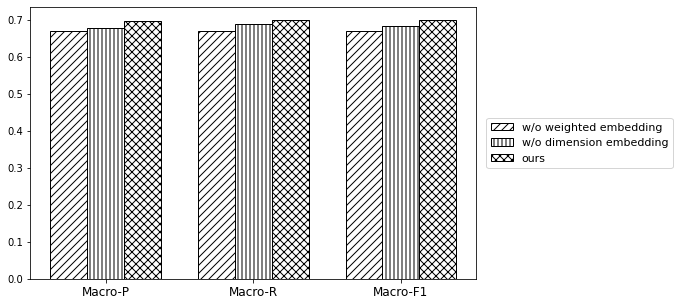

In [ ]:
bar_width = 0.25
plt.figure(figsize=(8, 5))
plt.bar(np.arange(3), df["w/o weighted embedding"], color="white", edgecolor="k", label="w/o weighted embedding", hatch="///", alpha=1, width=bar_width)
plt.bar(np.arange(3) + bar_width, df["w/o dimension embedding"], color="white", edgecolor="k", label="w/o dimension embedding", hatch="|||", alpha=1, width=bar_width)
plt.bar(np.arange(3) + 2*bar_width, df["ours"], color="white", edgecolor="k", label="ours", hatch="XXX", alpha=1, width=bar_width)
plt.legend(bbox_to_anchor=(1.01, 0.5), loc=6, fontsize=11)
plt.xticks(np.arange(3)+bar_width, labels=df.index, fontsize=12)
plt.savefig("./Aspect_Sentiment_Analysis/result/ablation_result.jpg", dpi=300, bbox_inches="tight")

In [2]:
with open("./Aspect_Sentiment_Analysis/result/ERNIE_weighted_embedding_result.json") as fp:
    result = json.load(fp)

In [11]:
loss = pd.DataFrame(result).T[["train_loss", "val_loss"]].iloc[:20]
loss.index = list(range(20))

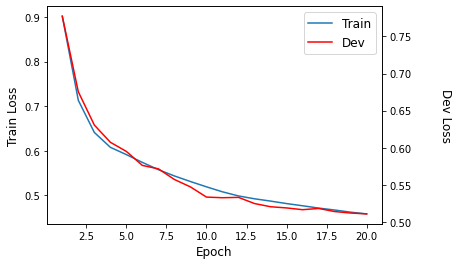

In [13]:
epoch = 20
fig, ax1 = plt.subplots(1, 1)
line_1 = ax1.plot(range(1, epoch+1), loss["train_loss"].iloc[:epoch], label="Train")
ax2 = ax1.twinx()
line_2 = ax2.plot(range(1, epoch+1), loss["val_loss"].iloc[:epoch], color="r", label="Dev")
lines = line_1 + line_2
plt.legend(lines, ["Train", "Dev"], fontsize=12)
ax1.set_xlabel("Epoch", fontsize=12)
ax1.set_ylabel("Train Loss", fontsize=12)
ax2.set_ylabel("Dev Loss", fontsize=12, rotation=-90)
ax2.yaxis.set_label_coords(1.21, 0.5)
fig.savefig("./Aspect_Sentiment_Analysis/result/ernie_weighted_embedding_loss.jpg", dpi=300, bbox_inches="tight")